In [1]:
import sys 
import os 
sys.path.insert(0, '..')

In [2]:
import shutil
import os 

_outs = './test_outputs'
if os.path.exists(_outs):
    shutil.rmtree(_outs)

In [ ]:
from typing import * 
import os

import numpy as np 
import pandas as pd

from biosimulator_processes.execute import exec_utc_comparison
from server.handlers.compare import generate_utc_species_comparison

In [ ]:
omex_source_dir = './examples/sbml-core'
omex_name = 'Elowitz-Nature-2000-Repressilator.omex'
omex_fp = os.path.join(omex_source_dir, omex_name)
out_dir = './test_outputs'
simulators = ['amici', 'copasi', 'tellurium']
spec_name = 'cI mRNA'

In [ ]:
result = generate_utc_species_comparison(omex_fp, out_dir, spec_name, simulators)

In [ ]:
os.path.exists('test_outputs/amici_outputs/reports.h5')

In [ ]:
result

In [ ]:
from server.handlers.output_data import generate_biosimulator_outputs


biosim_outputs = generate_biosimulator_outputs(omex_fp, out_dir, simulators)

In [ ]:
!ls test_outputs

In [ ]:
result

In [ ]:
comparison = exec_utc_comparison(
    omex_fp=omex_fp, 
    simulators=simulators, 
    comparison_id='utc-comparison',
    include_outputs=False)

In [ ]:
comparison

In [ ]:
comparison.keys()

In [ ]:
from server.data_model import UtcComparison, UtcSpeciesComparison

In [5]:
from kisao import ALGORITHM_SUBSTITUTION_POLICY_LEVELS, AlgorithmSubstitutionPolicy


AlgorithmSubstitutionPolicy.ANY


<AlgorithmSubstitutionPolicy.ANY: 'ANY'>

In [ ]:
from server.handlers.io import get_sbml_species_names, unpack_omex
from tempfile import mkdtemp
import os

model = await get_sbml_species_names('/Users/alexanderpatrie/Desktop/repos/verification-service/tests/examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml')


In [ ]:
ids = [spec for spec in model.getListOfSpecies()]

In [ ]:
ids


In [ ]:
dir(ids[0])

In [ ]:
import requests 


from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

url = "https://localhost:8000/biosimulators-utc-comparison"

resp = requests.post(url, verify=False)

resp

In [ ]:
from biosimulator_processes.io import read_report_outputs


report = read_report_outputs('./examples/sbml-core/Varusai-Sci-Rep-2018-mTOR-signaling-LSODA-LSODAR-SBML/reports.h5')



In [ ]:
import tellurium as te

# Define the composite model
antimony_model = '''
model composite_model
  // Gene Expression Model
  model gene_expression
    var DNA, mRNA, Protein
    const k_transcription = 0.1, k_translation = 0.05, k_deg_mRNA = 0.01, k_deg_protein = 0.005
    DNA -> mRNA ; k_transcription * DNA
    mRNA -> Protein ; k_translation * mRNA
    mRNA -> ; k_deg_mRNA * mRNA
    Protein -> ; k_deg_protein * Protein
    DNA = 1
    mRNA = 0
    Protein = 0
  end

  // Metabolic Pathway Model
  model metabolic_pathway
    var Substrate, Product, Enzyme
    const k_cat = 0.1, K_m = 0.05, E_total = 1
    Substrate + Enzyme -> Product + Enzyme ; (k_cat * Substrate * Enzyme) / (K_m + Substrate)
    Substrate = 10
    Product = 0
    Enzyme = E_total
  end

  // Composite Model
  gene_expression = gene_expression
  metabolic_pathway = metabolic_pathway
  metabolic_pathway.Enzyme = gene_expression.Protein
end
'''

# Load the model
r = te.loadAntimonyModel(antimony_model)

# Simulate the model
result = r.simulate(0, 100, 1000)

# Plot the results
r.plot(result)

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  BIOMD0000000002_sim.sedml:
    Tasks (1):
      BIOMD0000000002_task
    Reports (1):
      report: 14 data sets
    Plots (1):
      Figure_4b: 5 curves

Executing SED-ML file 1: BIOMD0000000002_sim.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `BIOMD0000000002_task`
    Outputs:
      `Figure_4b`
      `report`
  Executing task 1: `BIOMD0000000002_task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_4b` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

COMBINE/OMEX archive has warnings.
  - The manifest does not include its parent COMBINE/OMEX archive. Manifests should include their parent COMBINE/OMEX archives.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `BIOMD0000000002` has warnings.
    - The model file `BIOMD0000000002_url.xml` has warnings.
      - 17 warnings of type SBML unit consistency (99505). The following is the first warning at 

 succeeded

Bundling outputs ...
Cleaning up ...


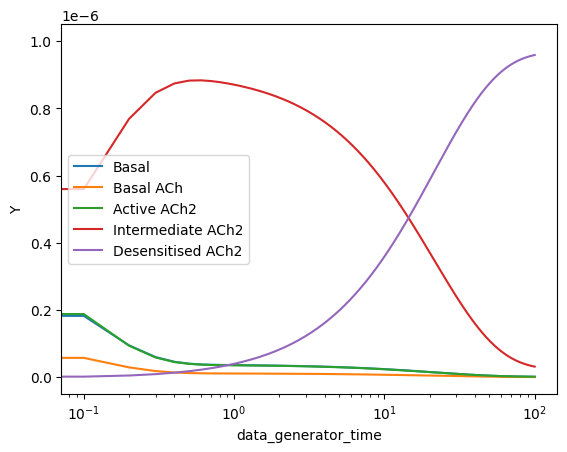

In [9]:
from biosimulators_copasi.core import exec_sedml_docs_in_combine_archive
from biosimulator_processes.io import read_report_outputs
from tempfile import mkdtemp
import os
from biosimulators_utils.config import Config

save_dir = os.getcwd()
result = exec_sedml_docs_in_combine_archive(
    '../tests/examples/sbml-core/Edelstein-Biol-Cybern-1996-Nicotinic-excitation.omex', save_dir, Config(LOG=False), fix_copasi_generated_combine_archive=True)

report_output = read_report_outputs(os.path.join(save_dir, 'reports.h5'))

In [10]:
report_output

BiosimulationsRunOutputData(report_path='/Users/alexanderpatrie/Desktop/repos/verification-service/tests/reports.h5', data=[BiosimulationsReportOutput(dataset_label='Time (dimensionless)', data=array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])), BiosimulationsReportOutput(dataset_label='ACh', data=array([1.00000000e-05, 8.42855163e-06, 8.22494777e-06, ...,
       8.00967257e-06, 8.00966883e-06, 8.00966511e-06])), BiosimulationsReportOutput(dataset_label='Active', data=array([0.00000000e+00, 9.11406032e-12, 4.73597357e-12, ...,
       6.62301817e-14, 6.61485087e-14, 6.60672171e-14])), BiosimulationsReportOutput(dataset_label='Active ACh', data=array([0.00000000e+00, 2.67057444e-09, 1.35806349e-09, ...,
       1.86810027e-11, 1.86579586e-11, 1.86350222e-11])), BiosimulationsReportOutput(dataset_label='Active ACh2', data=array([0.00000000e+00, 1.87918445e-07, 9.36751716e-08, ...,
       1.27776147e-09, 1.27618486e-09, 1.27461562e-09])), BiosimulationsReportOutput(dataset_label='Basal

In [18]:
import os 
from server.handlers.output_data import generate_biosimulator_utc_outputs, _get_output_stack

omex_fp = '../tests/examples/sbml-core/Edelstein-Biol-Cybern-1996-Nicotinic-excitation.omex'
out_dir = os.getcwd()
simulators = ['amici', 'copasi', 'tellurium']
os.path.exists(omex_fp)

True

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  BIOMD0000000002_sim.sedml:
    Tasks (1):
      BIOMD0000000002_task
    Reports (1):
      report: 14 data sets
    Plots (1):
      Figure_4b: 5 curves

Executing SED-ML file 1: BIOMD0000000002_sim.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `BIOMD0000000002_task`
    Outputs:
      `Figure_4b`
      `report`
  Executing task 1: `BIOMD0000000002_task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `BIOMD0000000002` has warnings.
    - The model file `BIOMD0000000002_url.xml` has warnings.
      - 17 warnings of type SBML unit consistenc

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_4b` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'LSODA' (KISAO_0000088) at substitution policy 'SIMILAR_VARIABLES'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  BIOMD0000000002_sim.sedml:
    Tasks (1):
      BIOMD0000000002_task
    Reports (1):
      report: 14 data sets
    Plots (1):
      Figure_4b: 5 curves

Executing SED-ML file 1: BIOMD0000000002_sim.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `BIOMD0000000002_task`
    Outputs:
      `Figure_4b`
      `report`
  Executing task 1: `BIOMD0000000002_task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_4b` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `BIOMD0000000002` has warnings.
    - The model file `BIOMD0000000002_url.xml` has warnings.
      - 17 warnings of type SBML unit consistenc

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  BIOMD0000000002_sim.sedml:
    Tasks (1):
      BIOMD0000000002_task
    Reports (1):
      report: 14 data sets
    Plots (1):
      Figure_4b: 5 curves

Executing SED-ML file 1: BIOMD0000000002_sim.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `BIOMD0000000002_task`
    Outputs:
      `Figure_4b`
      `report`
  Executing task 1: `BIOMD0000000002_task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_4b` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `BIOMD0000000002` has warnings.
    - The model file `BIOMD0000000002_url.xml` has warnings.
      - 17 warnings of type SBML unit consistenc

 succeeded

Bundling outputs ...
Cleaning up ...


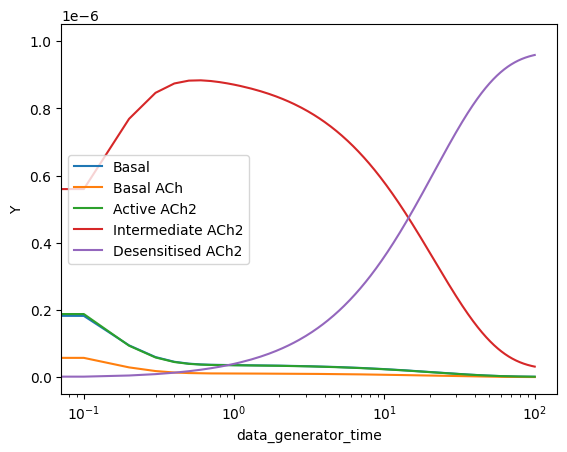

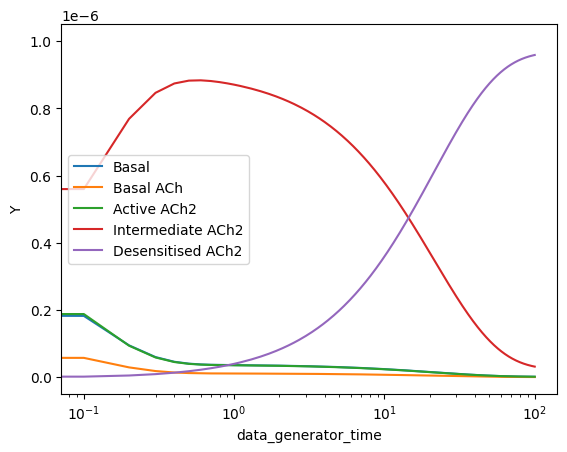

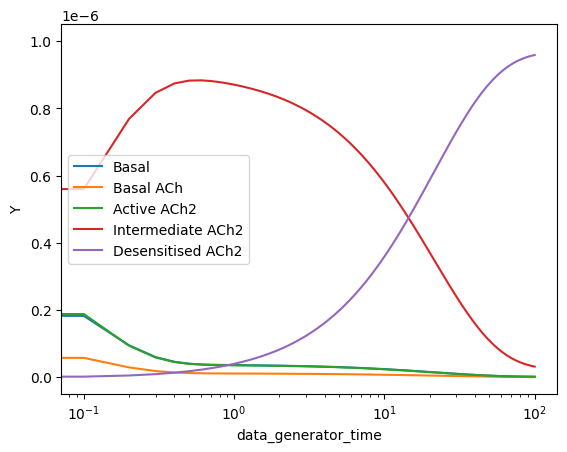

In [19]:
output_data = await generate_biosimulator_utc_outputs(omex_fp, out_dir, simulators)
# outputs = _get_output_stack(output_data, species_name)

In [23]:
output_data


species_names_amici = [d['dataset_label'] for d in output_data['amici']['data']]
species_names_te = [d['dataset_label'] for d in output_data['tellurium']['data']]

In [27]:
outputs = []
for i, name in enumerate(species_names_amici):
    stack = _get_output_stack(output_data['amici']['data'][i], name)

TypeError: string indices must be integers, not 'str'

In [28]:
def _get_output_stack(outputs: dict, spec_id: str):
    output_stack = []
    for sim_name in outputs.keys():
        sim_data = outputs[sim_name]['data']
        for data_index, data in enumerate(sim_data):
            data_id = data['dataset_label']
            if data_id == spec_id:
                print(spec_id, data_id)
                output_stack.append(sim_data[data_index]['data'])
            else:
                pass
    return np.stack(output_stack)

In [29]:
species_names_amici

['Time (dimensionless)',
 'ACh',
 'Active',
 'Active ACh',
 'Active ACh2',
 'Basal',
 'Basal ACh',
 'Basal ACh2',
 'Desensitised',
 'Desensitised ACh',
 'Desensitised ACh2',
 'Intermediate',
 'Intermediate ACh',
 'Intermediate ACh2']

In [31]:
ach_stack = _get_output_stack(output_data['amici'], species_names_amici[1])

TypeError: string indices must be integers, not 'str'

In [33]:
output_data['amici']['data'][1]['data']

array([1.00000000e-05, 8.42855199e-06, 8.22494896e-06, ...,
       8.00967257e-06, 8.00966883e-06, 8.00966510e-06])

Archive contains 1 SED-ML documents with 4 models, 5 simulations, 5 tasks, 5 reports, and 5 plots:
  simulation.sedml:
    Tasks (5):
      tsk_0_0
      tsk_0_1
      tsk_0_3
      tsk_1_0
      tsk_1_1
    Reports (5):
      report_Euler_small_step_size: 10 data sets
      report_Fig_1_c: 10 data sets
      report_Fig_1a: 10 data sets
      report_low_delta_R_det: 10 data sets
      report_low_delta_R_stoch: 10 data sets
    Plots (5):
      plot2d_Euler_small_step_size: 9 curves
      plot2d_Fig_1_c: 9 curves
      plot2d_Fig_1a: 9 curves
      plot2d_low_delta_R_det: 9 curves
      plot2d_low_delta_R_stoch: 9 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 5 tasks and 10 outputs:
    Tasks:
      `tsk_0_0`
      `tsk_0_1`
      `tsk_0_3`
      `tsk_1_0`
      `tsk_1_1`
    Outputs:
      `plot2d_Euler_small_step_size`
      `plot2d_Fig_1_c`
      `plot2d_Fig_1a`
      `plot2d_low_delta_R_det`
      `plot2d_low_delta_R_stoch`
      `report_Euler_small_step_size`
      

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

COMBINE/OMEX archive has warnings.
  - The manifest does not include its parent COMBINE/OMEX archive. Manifests should include their parent COMBINE/OMEX archives.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model

 succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... queued
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... queued
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... succeeded
      Generating output 7: `plot2d_low_delta_R_det` ... queued
      Generating output 8: `plot2d_Euler_small_step_size` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 queued
      Generating output 9: `plot2d_Fig_1_c` ... queued
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 2: `tsk_0_1`
    Executing simulation ... succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... succeeded
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... queued
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... succeeded
      Generating output 7: `plot2d_low_delta_R_det` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 succeeded
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ... queued
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 3: `tsk_0_3`
    Executing simulation ... failed
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... succeeded
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... queued
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ... succeeded
      Generating output 7: `plot2d_low_delta_R_det` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 succeeded
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ... queued
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 4: `tsk_1_0`
    Executing simulation ... succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ... succeeded
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... succeeded
      Generating output 5: `report_low_delta_R_stoch` ... queued
      Generating output 6: `plot2d_Fig_1a` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the X axis because the X data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/

 succeeded
      Generating output 7: `plot2d_low_delta_R_det` ... succeeded
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ... succeeded
      Generating output 10: `plot2d_low_delta_R_stoch` ... queued
  Executing task 5: `tsk_1_1`
    Executing simulation ... succeeded
    Generating 10 outputs ...
      Generating output 1: `report_Fig_1a` ... succeeded
      Generating output 2: `report_low_delta_R_det` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with th

 succeeded
      Generating output 3: `report_Euler_small_step_size` ... queued
      Generating output 4: `report_Fig_1_c` ... succeeded
      Generating output 5: `report_low_delta_R_stoch` ... succeeded
      Generating output 6: `plot2d_Fig_1a` ... succeeded
      Generating output 7: `plot2d_low_delta_R_det` ... succeeded
      Generating output 8: `plot2d_Euler_small_step_size` ... queued
      Generating output 9: `plot2d_Fig_1_c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/viz/io.py:35: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because captur

 succeeded
      Generating output 10: `plot2d_low_delta_R_stoch` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



CombineArchiveExecutionError: The COMBINE/OMEX did not execute successfully:

  The SED document did not execute successfully:
  
    Simulation failed: 8910 nan value(s) found in results with algorithm `KISAO_0000030` (euler)
      - subdivision_steps: 1

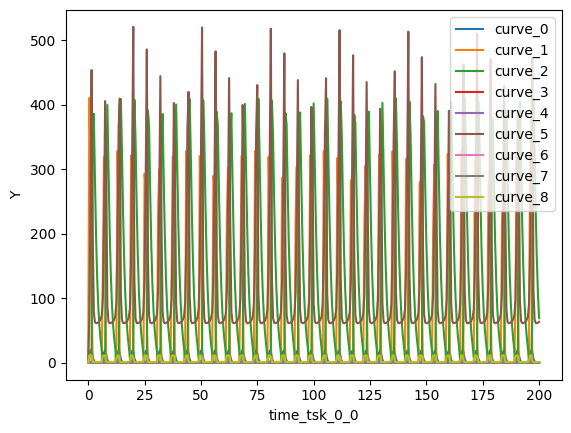

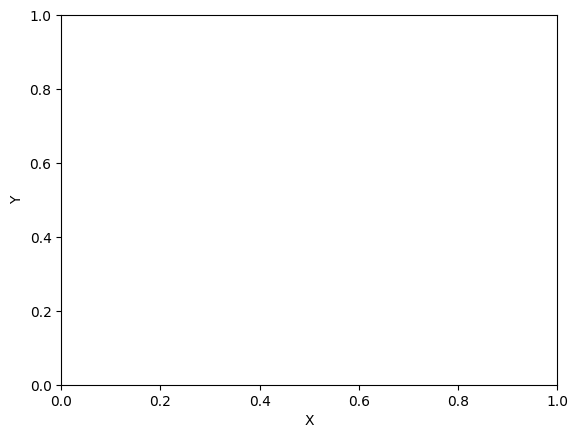

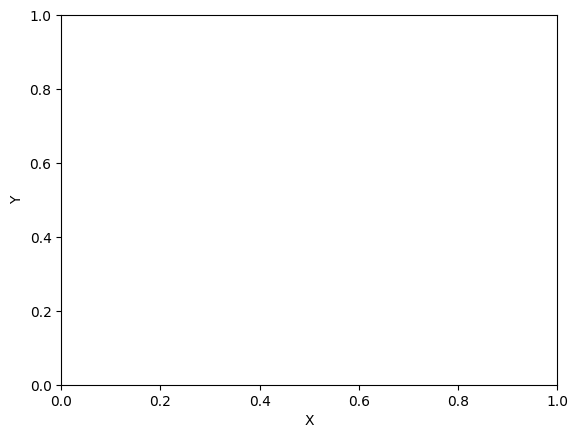

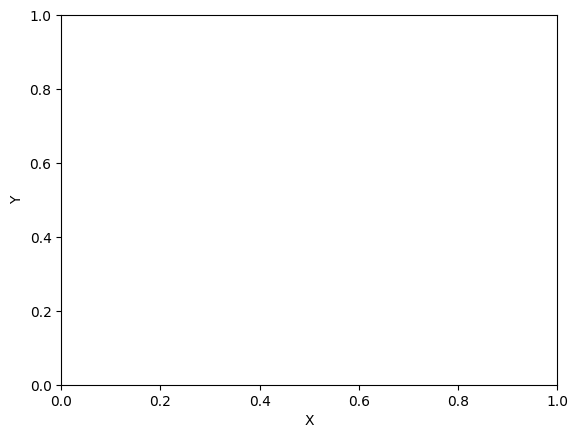

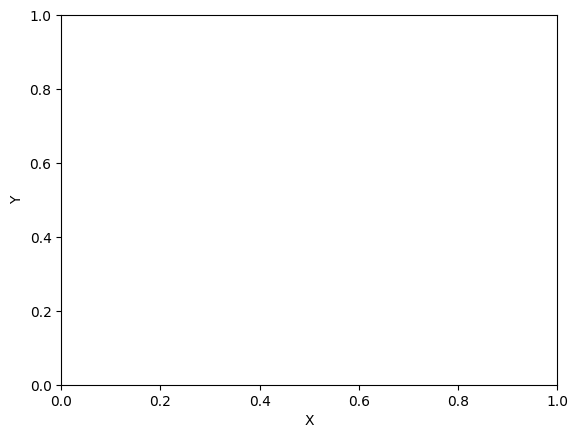

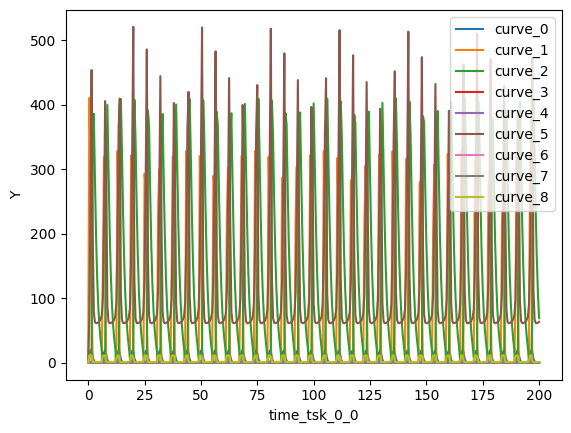

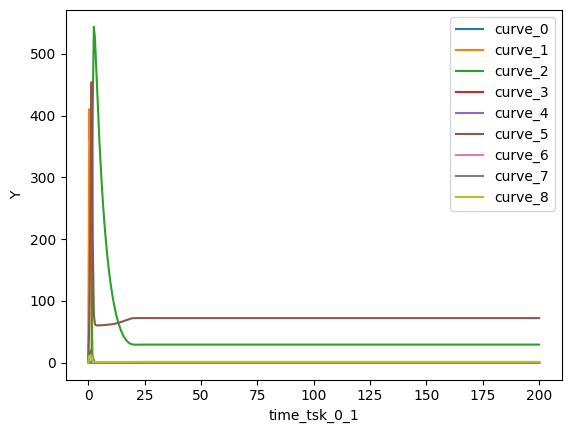

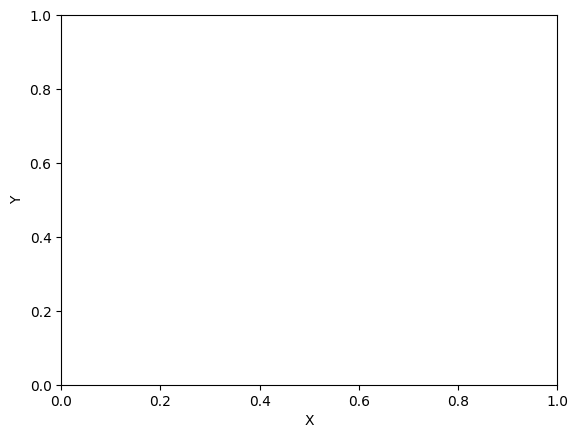

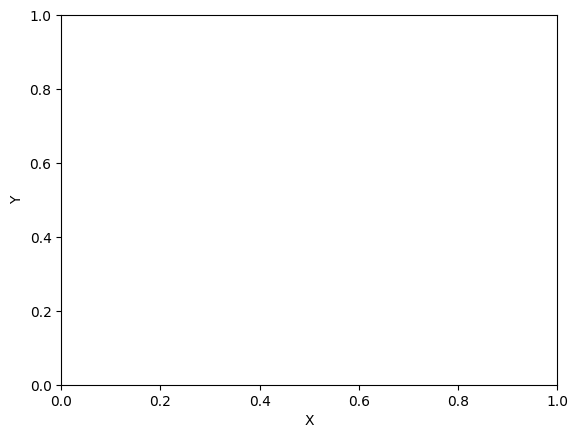

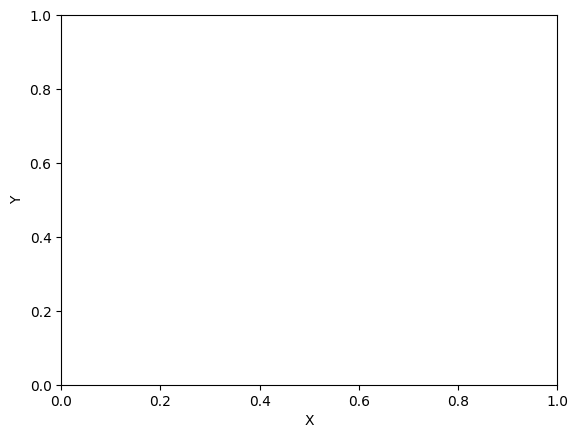

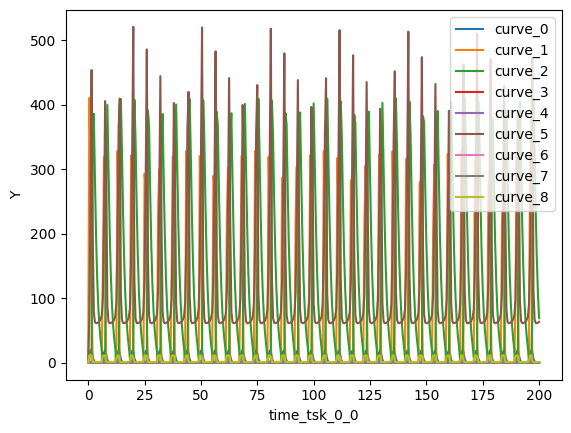

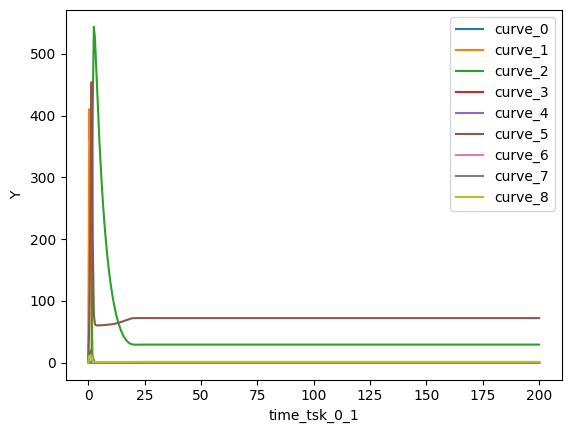

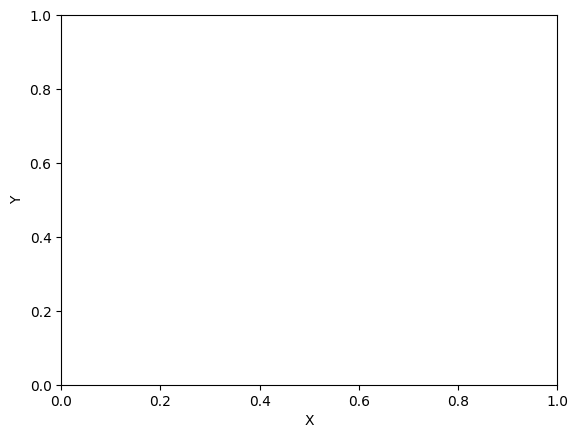

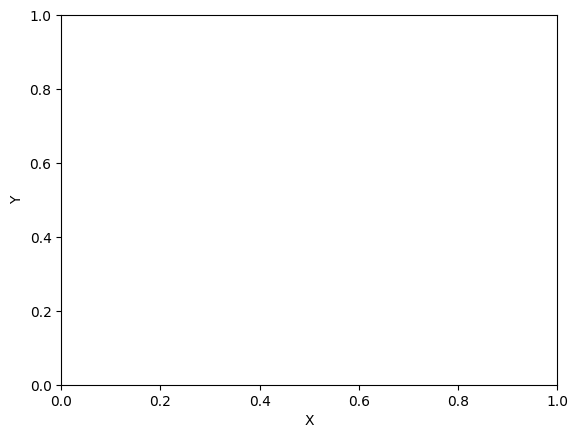

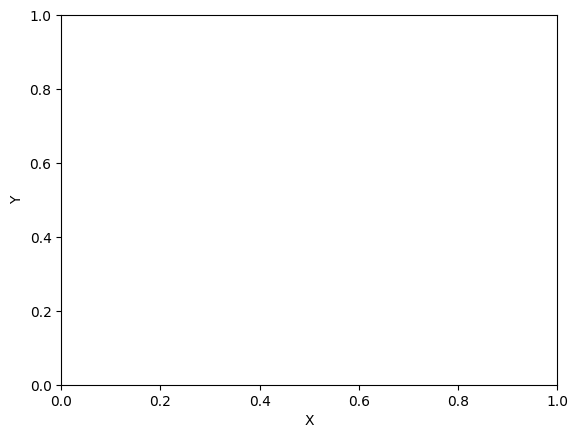

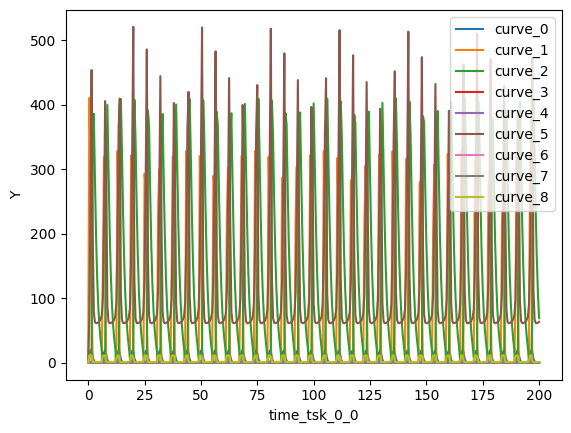

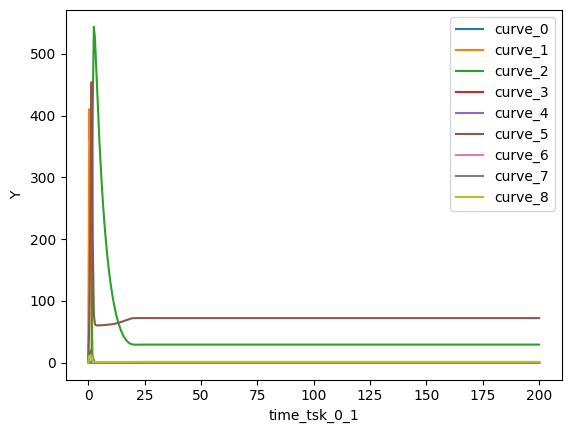

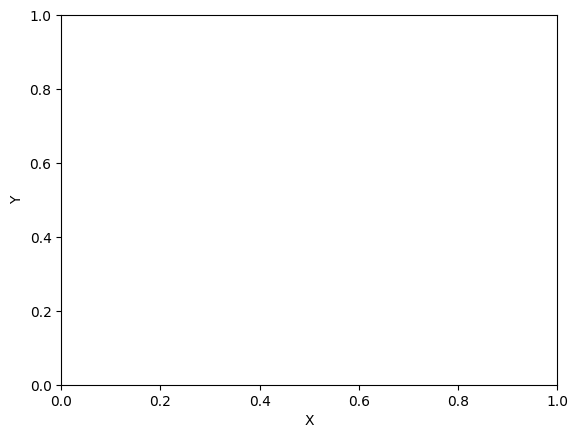

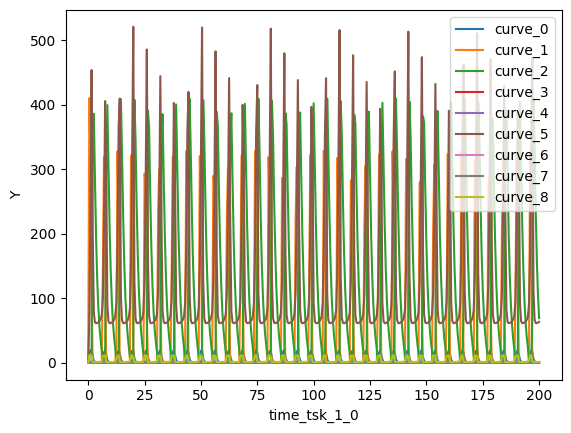

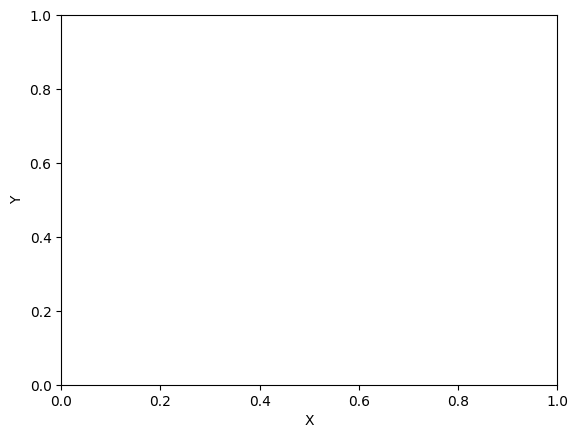

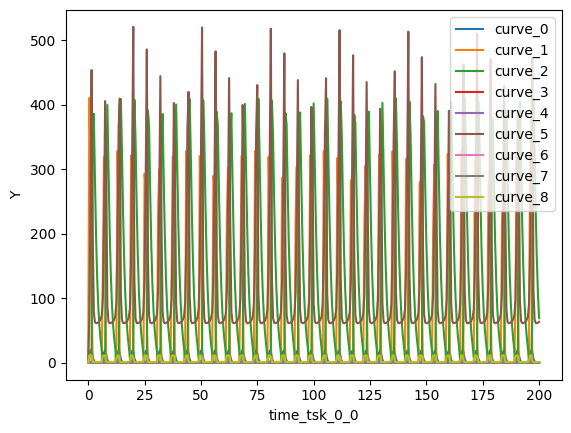

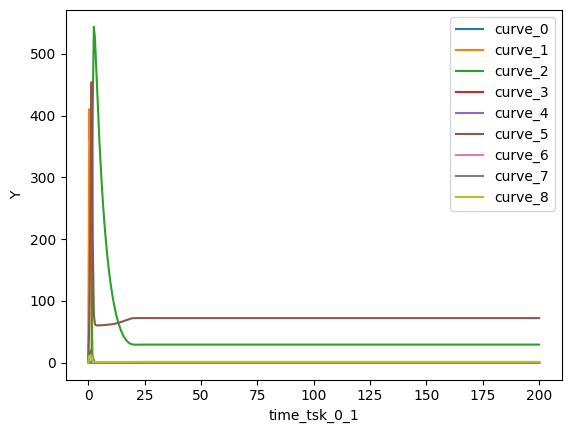

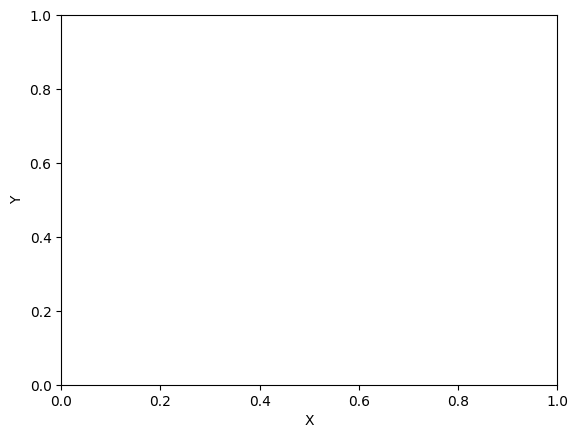

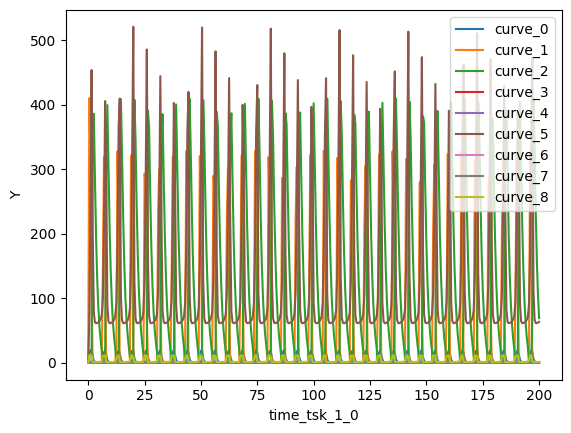

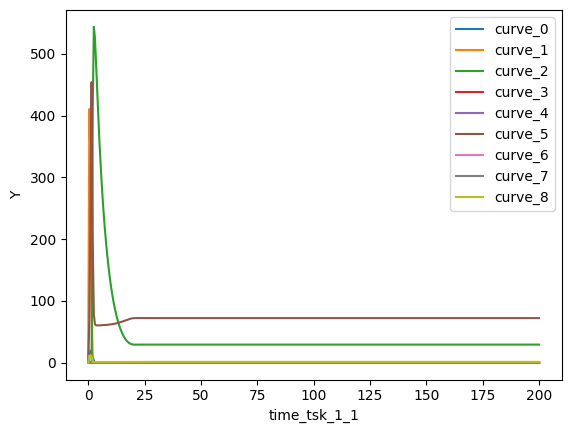

In [1]:
from biosimulators_tellurium.core import exec_sedml_docs_in_combine_archive
from biosimulators_utils.config import Config 
from kisao import AlgorithmSubstitutionPolicy
import os 


save_dir = os.getcwd()
policy = AlgorithmSubstitutionPolicy.ANY 
omex_fp = '../tests/examples/sbml-core/Vilar-PNAS-2002-minimal-circardian-clock.omex'
config = Config(ALGORITHM_SUBSTITUTION_POLICY=policy, LOG=False)

results, log = exec_sedml_docs_in_combine_archive(archive_filename=omex_fp, out_dir=save_dir, config=config)

In [2]:
results